# Stochastic Programming and Applications

Plot showing the life expectancy using data from the World Health
Organization (WHO) between 2000 and 2021 in Kenya.

Kabui, Charles  
2025-03-11

 *** 
[Read at <u>**ToKnow**</u>.ai](https://toknow.ai/posts/computational-techniques-in-data-science/stochastic-programming-and-applications/index.html) -- [Download as Notebook](https://toknow.ai/posts/computational-techniques-in-data-science/stochastic-programming-and-applications/index.output.ipynb) -- [Download as PDF](https://toknow.ai/posts/computational-techniques-in-data-science/stochastic-programming-and-applications/index.pdf)
 *** 

## Description

Stochastic programming is an optimization framework that incorporates
uncertainty into decision-making models. Unlike deterministic
optimization, which assumes perfect/fixed information about all
parameters, stochastic programming accounts for randomness in
constraints and objectives.

Key Features of Stochastic Programming:

1.  **Decision Variables**: Represent choices to be optimized.

2.  **Uncertainty (Random Variables)**: Captures variability in
    parameters.

3.  **Objective Function**: Typically involves expected value
    optimization.

4.  **Constraints**: Incorporate probabilistic constraints or chance
    constraints.

## Application

> The goal is often to **minimize expected cost** or **maximize expected
> profit** while considering risk measures.

1.  **Newsvendor Problem**

    A vendor must decide how many items to stock without knowing the
    exact demand. The goal is to minimize expected costs, balancing:

    **Overstock costs:** Money lost on unsold items<br> **Understock
    costs:** Lost revenue from unmet demand

    Optimal stocking levels depend on the probability distribution of
    demand.

2.  **Portfolio Optimization**

    In finance, investors allocate funds across assets to maximize
    expected returns while controlling risk. The problem involves:

    **Decision variables:** Asset allocation weights<br> **Objective:**
    Maximize expected returns considering the risk<br> **Constraints:**
    Budget (weights sum to 1), non-negativity, diversification limits.

    The solution balances the trade-off between return and risk across
    various market scenarios.

#### Imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

### Supply Chain Optimization under Demand Uncertainty

Consider Supply Chain Optimization under Demand Uncertainty. Demand for
electronic supply in Nairobi in the past two weeks together with their
respective probability is given below:

| Demand | Probability |
|--------|-------------|
| 255    | 0.03        |
| 302    | 0.15        |
| 270    | 0.04        |
| 317    | 0.1         |
| 285    | 0.05        |
| 332    | 0.05        |
| 300    | 0.09        |
| 347    | 0.01        |
| 315    | 0.09        |
| 362    | 0.03        |
| 330    | 0.2         |
| 262    | 0.07        |
| 309    | 0.05        |
| 277    | 0.04        |

Consider `constraints = [supply >= 120, supply <= 330]`. Compute the
optimal supply.

In [ ]:
# Given demand data
demand = np.array([
    255, 
    302, 
    270, 
    317, 
    285, 
    332, 
    300, 
    347, 
    315, 
    362, 
    330, 
    262, 
    309, 
    277])
probability = np.array([
    0.03, 
    0.15, 
    0.04, 
    0.1, 
    0.05, 
    0.05, 
    0.09, 
    0.01, 
    0.09, 
    0.03, 
    0.2, 
    0.07, 
    0.05, 
    0.04])

In [7]:
# Verify that probabilities sum to 1
print(f"Sum of probabilities: {np.sum(probability):.2f}")

Sum of probabilities: 1.00

In [8]:
# Define the supply decision variable
supply = cp.Variable()

# Constraints: supply should be between 120 and 330
constraints = [supply >= 120, supply <= 330]

In [9]:
# Define the expected deviation cost function (penalizing shortages and excesses)
cost = cp.sum(cp.multiply(probability, cp.abs(supply - demand)))

# Define the optimization problem
problem = cp.Problem(cp.Minimize(cost), constraints)

# Solve the problem
_ = problem.solve()

#### Explanation:

-   **`cp.abs(supply - demand)`**
    -   This penalizes both over-supply (**excess**) and under-supply
        (**shortages**), treating both as equally costly.
    -   This is useful when deviations in either direction are
        undesirable.
    -   This is our scenario!
-   **`cp.pos(supply - demand)`**
    -   This only penalizes cases where `supply > demand`, meaning it
        considers only **excess supply** as costly.
    -   It does **not** penalize shortages, which may not be ideal if
        stockouts are a concern.

In [10]:
# Print the optimal supply value
optimal_supply = supply.value
print("Optimal Supply:", optimal_supply)

Optimal Supply: 309.00000011886954

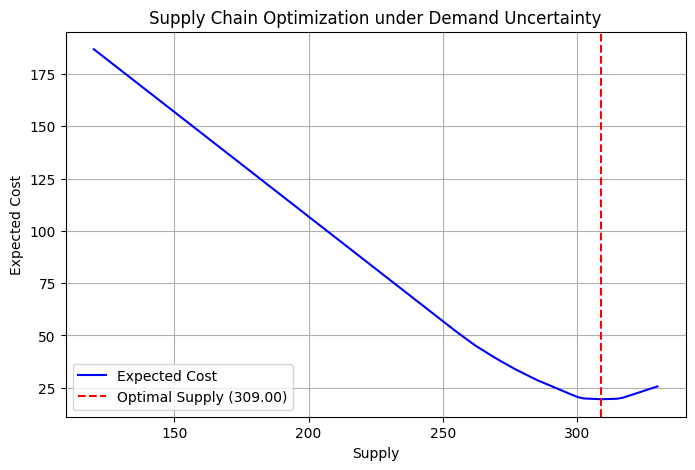

In [11]:
# Plot the cost function over a range of supply values
supply_range = np.linspace(120, 330, 100)
cost_values = [sum(p * abs(s - d) for p, d in zip(probability, demand)) for s in supply_range]

plt.figure(figsize=(8, 5))
plt.plot(supply_range, cost_values, label='Expected Cost', color='blue')
plt.axvline(optimal_supply, color='red', linestyle='--', label=f'Optimal Supply ({optimal_supply:.2f})')
plt.xlabel('Supply')
plt.ylabel('Expected Cost')
plt.title('Supply Chain Optimization under Demand Uncertainty')
plt.legend()
plt.grid()
plt.show()

### Healthcare Resource Allocation with Uncertain Demand

Consider ICU Bed Allocation under Uncertain Patient Arrivals. Number of
unscheduled arrivals at Kenyatta National Hospital in the last 10 days
has been `[25, 20, 30, 50, 27, 39, 42, 29, 35, 42]` patients with
assigned probabilities
`[0.1, 0.1, 0.08, 0.15, 0.09, 0.05, 0.1, 0.1, 0.13, 0.1]` respectively.
Consider bed constraints = `[beds >= 17, beds <= 55]`. Compute the
optimal number of ICU beds allocation.

In [12]:
# Given ICU arrival values and their probabilities
arrivals = np.array([25, 20, 30, 50, 27, 39, 42, 29, 35, 42])
probability = np.array([0.1, 0.1, 0.08, 0.15, 0.09, 0.05, 0.1, 0.1, 0.13, 0.1])

In [13]:
# Verify that probabilities sum to 1
print(f"Sum of probabilities: {np.sum(probability):.2f}")

Sum of probabilities: 1.00

In [14]:
# Define the bed allocation decision variable
beds = cp.Variable()

# Constraints: beds should be between 17 and 55
constraints = [beds >= 17, beds <= 55]

In [15]:
# Define the expected deviation cost function (penalizing shortages and excesses)
cost = cp.sum(cp.multiply(probability, cp.abs(beds - arrivals)))

# Define the optimization problem
problem = cp.Problem(cp.Minimize(cost), constraints)

# Solve the problem
_ = problem.solve()

In [16]:
# Print the optimal bed allocation
optimal_beds = beds.value
print("Optimal ICU Beds Allocation:", optimal_beds)

Optimal ICU Beds Allocation: 34.99999972144706

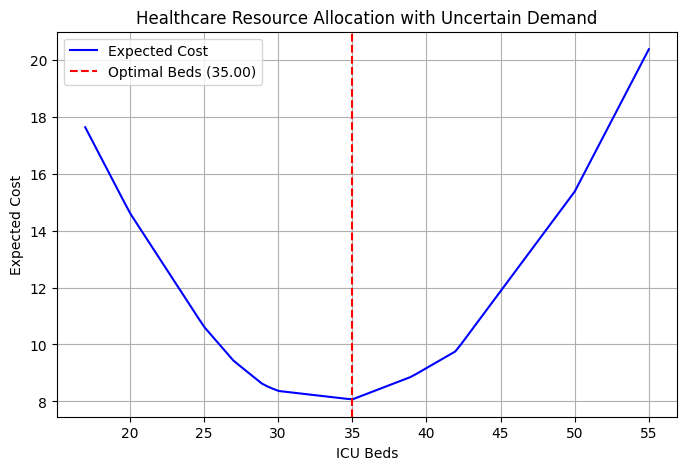

In [17]:
# Plot the cost function over a range of bed allocations
bed_range = np.linspace(17, 55, 100)
cost_values = [sum(p * abs(b - a) for p, a in zip(probability, arrivals)) for b in bed_range]

plt.figure(figsize=(8, 5))
plt.plot(bed_range, cost_values, label='Expected Cost', color='blue')
plt.axvline(optimal_beds, color='red', linestyle='--', label=f'Optimal Beds ({optimal_beds:.2f})')
plt.xlabel('ICU Beds')
plt.ylabel('Expected Cost')
plt.title('Healthcare Resource Allocation with Uncertain Demand')
plt.legend()
plt.grid()
plt.show()

------------------------------------------------------------------------

***Disclaimer:*** *For information only. Accuracy or completeness not
guaranteed. Illegal use prohibited. Not professional advice or
solicitation.* ***Read more:
[/terms-of-service](https://toknow.ai/terms-of-service)***